# Importing the packages

In [300]:
import os
import sys
import pickle
import numpy as np
import pandas as pd
from PIL import Image, ImageFilter
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs


In [301]:
np.random.seed(100)

# creating data, Non Linearly Separable Data


In [302]:
data, labels = make_blobs(n_samples=1000, centers=4 , n_features= 2, random_state=0)
print(data.shape)
print(labels.shape)

(1000, 2)
(1000,)


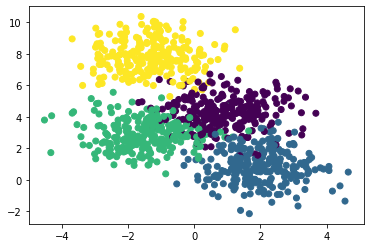

In [303]:
plt.scatter(data[:,0], data[:,1], c=labels)

In [304]:
data[:,0].shape

(1000,)

In [305]:
data[:,1].shape

(1000,)

In [306]:
# this is not the binary classficiton problem




In [307]:
# first  lets create  binary clas problwm which is not linearly separable

In [308]:
labels_orig = labels
labels = np.mod(labels_orig, 2)

labels

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,

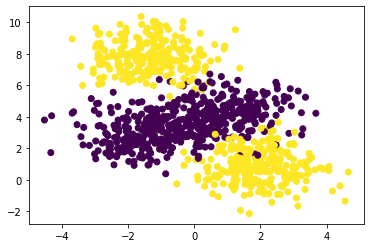

In [309]:
plt.scatter(data[:,0], data[:,1], c=labels )

# feed forward network  for binary Classification



In [310]:
class FFNetwork():
    def __init__(self):
        self.w1 = np.random.randn()
        self.w2 = np.random.randn()
        self.w3 = np.random.randn()
        self.w4 = np.random.randn()
        self.w5 =np.random.randn()
        self.w6 =np.random.randn()
        self.b1 = 0
        self.b2 =0
        self.b3 =0
    
    def sigmoid(self,x):
        return (1.0 / (1 + np.exp(-x)))
    
    def forward_pass(self,x):
        self.x1, self.x2 =x
        
        self.a1 = ( self.w1 * self.x1 ) + ( self.w2 *self.x2 ) + self.b1
        self.h1 = self.sigmoid(self.a1)
        
        self.a2 = (self.w3*self.x1) + (self.w4*self.x2) + self.b2
        self.h2 = self.sigmoid(self.a2)
        
        self.a3 = (self.w5* self.h1) + (self.w6 * self.h2) + self.b3
        self.h3 = self.sigmoid(self.a3)
        
        return self.h3
    
    
    def grad(self,x,y):
        # calcuate gradients for optimization, using gradient descent
        # here I have directly used the formula dervation are quite tiresome to carryout but 
        # I  will be puting a writen version Notes ,of how derivateis were obtained.
        
        
        self.forward_pass(x)
        
        self.dw5 = (self.h3 - y) * self.h3 * ( 1- self.h3) * self.h1
        self.dw6 = (self.h3 -y) * self.h3 * (1- self.h3) * self.h2
        self.db3 = (self.h3 -y) * self.h3 * ( 1- self.h3)
        
        self.dw1 = (self.h3 - y)* self.h3*(1-self.h3) * self.w5* self.h1 * (1 -self.h1)* self.x1
        self.dw2 = (self.h3 - y)* self.h3*(1-self.h3) * self.w5* self.h1 * (1 -self.h1)* self.x2
        self.db1 = (self.h3 - y) * self.h3 * (1 - self.h3) * self.w5 * self.h1 *(1- self.h1)
        
        
        self.dw3 = (self.h3 - y) * self.h3* (1- self.h3)* self.w6 * self.h2 * (1- self.h2)* self.x1
        self.dw4 = (self.h3 - y) * self.h3* (1- self.h3)* self.w6 * self.h2 * (1- self.h2)* self.x2
        self.db2 = (self.h3 - y) * self.h3* (1- self.h3)* self.w6 * self.h2 * (1- self.h2)


    def fit(self,X, Y,epochs=1, learning_rate=1, initialise = True, display_loss=False):
        #initialsie the weights,
        
        if initialise:
            self.w1 = np.random.randn()
            self.w2 = np.random.randn()
            self.w3 = np.random.randn()
            self.w4 = np.random.randn()
            self.w5 =np.random.randn()
            self.w6 =np.random.randn()
            self.b1 = 0
            self.b2 =0
            self.b3 =0
            
        if display_loss:
            loss ={}
            
        
        for i in tqdm_notebook(range(epochs), total  = epochs, unit ="epoch"):
            dw1,dw2,dw3 , dw4 , dw5, dw6,db1,db2, db3 =[0]* 9
            for x,y in zip(X,Y):
                self.grad(x,y)
                dw1 += self.dw1
                dw2 += self.dw2
                dw3 += self.dw3
                dw4 += self.dw4
                dw5 += self.dw5
                dw6 += self.dw6
                db1 += self.db1
                db2 += self.db2
                db3 += self.db3
                
            m =X.shape[1]
            self.w1 -= learning_rate * dw1 / m
            self.w2 -= learning_rate * dw2 / m
            self.w3 -= learning_rate * dw3 / m
            self.w4 -= learning_rate * dw4 / m
            self.w5 -= learning_rate * dw5 / m
            self.w6 -= learning_rate * dw6 / m
            self.b1 -= learning_rate * db1 / m
            self.b2 -= learning_rate * db2 / m
            self.b3 -= learning_rate * db3 / m
            
            if display_loss:
                Y_pred = self.predict(X)
                loss[i]  = mean_squared_error(Y_pred, Y)
                
            if display_loss:
                plt.plot(np.array(list(loss.values())).astype(float))
                plt.xlabel('Epoch')
                plt.ylabel("MSE")
                plt.show()
                
    def predict(self,X):
        Y_pred = []
        for x in X:
            y_pred = self.forward_pass(x)
            Y_pred.append(y_pred)
                
        return np.array(Y_pred)
                
        
        
    
    

In [311]:
FF =FFNetwork()


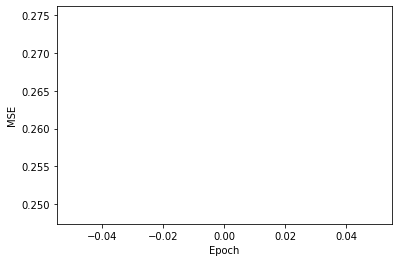

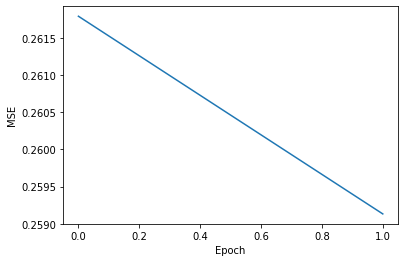

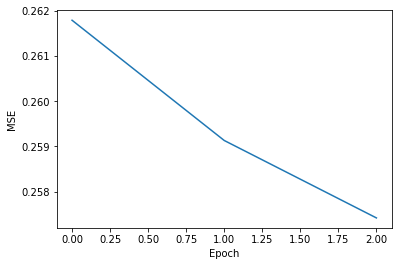

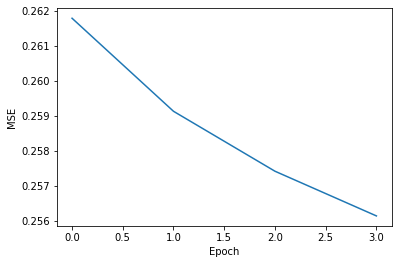

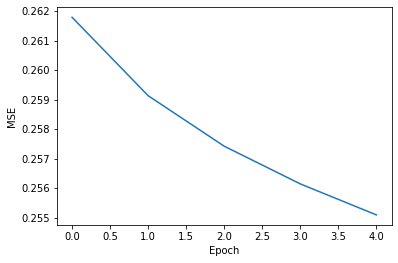

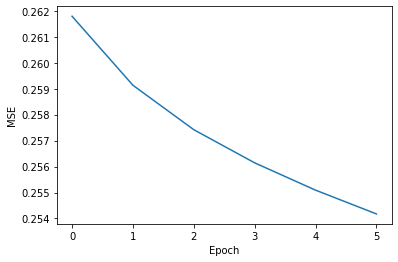

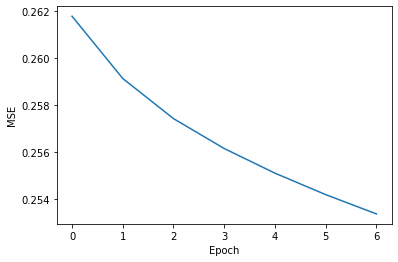

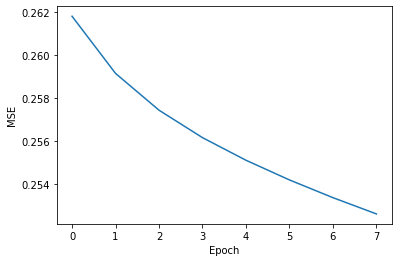

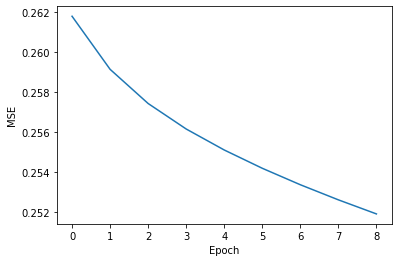

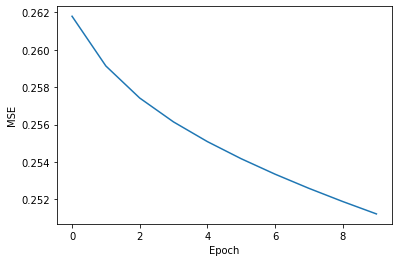

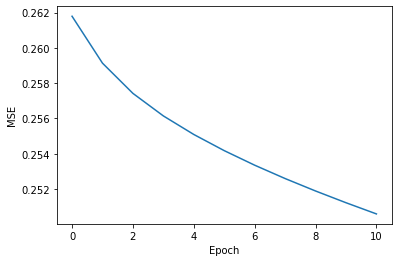

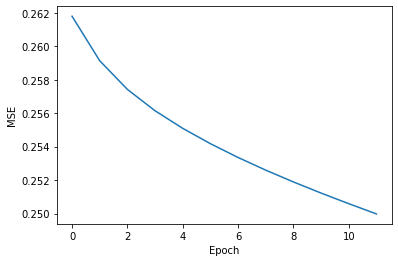

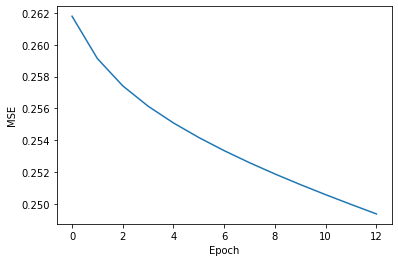

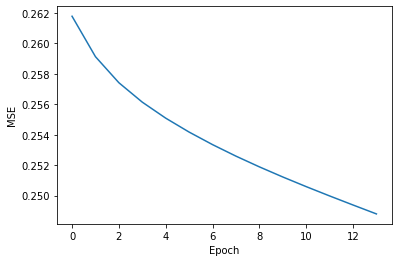

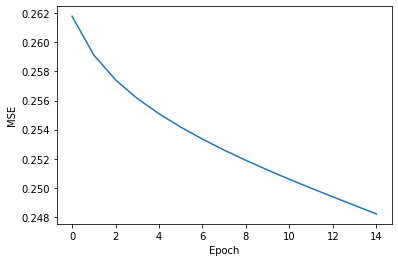

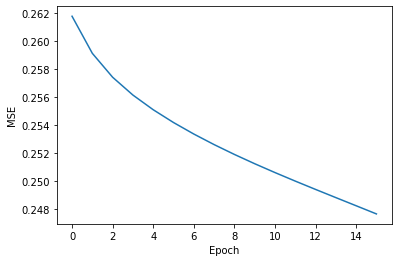

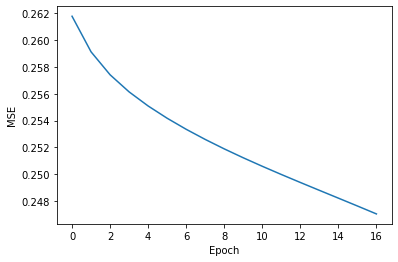

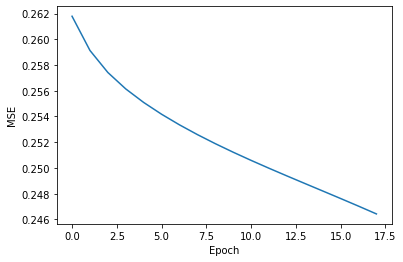

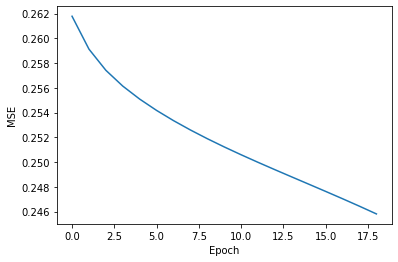

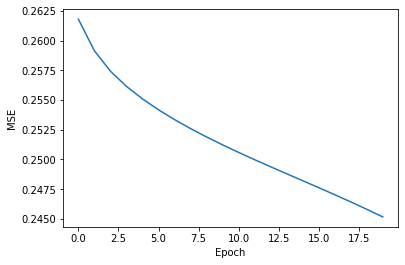

In [312]:
FF.fit(X_train,Y_train, epochs=20, learning_rate=0.01, display_loss=True)
    

# Generic feed forward network where we cna pass our desied no of hiddne neurons, layers,

In [313]:
class FFSNNetwork:  
    def __init__(self, n_inputs, hidden_sizes=[2]):
        self.nx = n_inputs
        self.ny = 1
        self.nh = len(hidden_sizes)
        # nx - is the number of inputs / features
        # hidden sizes is the num ber of hiddden neuron (picture for reference)
        self.sizes = [self.nx] + hidden_sizes + [self.ny] # this provies the number of layers in the neural Network.
        
        self.W = {}
        self.B = {}
        for i in range(self.nh+1):
            self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1]) # this is a matrix of weights
            self.B[i+1] = np.zeros((1, self.sizes[i+1])) # matrix of bias
        
    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))
  
    def forward_pass(self, x):
        self.A = {}
        self.H = {}
        self.H[0] = x.reshape(1, -1)
        for i in range(self.nh+1):
            self.A[i+1] = np.matmul(self.H[i], self.W[i+1]) + self.B[i+1] #matrix multiplication 
            self.H[i+1] = self.sigmoid(self.A[i+1])
        return self.H[self.nh+1]
        
    def grad_sigmoid(self, x):
        return x*(1-x) 
    
    def grad(self, x, y):
        self.forward_pass(x)
        self.dW = {}
        self.dB = {}
        self.dH = {}
        self.dA = {}
        L = self.nh + 1
        self.dA[L] = (self.H[L] - y)
        for k in range(L, 0, -1):
            
            self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
            self.dB[k] = self.dA[k]
            self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
            self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1]))
            
    def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):

        if initialise:
            for i in range(self.nh+1):
                self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
                self.B[i+1] = np.zeros((1, self.sizes[i+1]))

        if display_loss:
            loss = {}

        for e in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
            dW = {}
            dB = {}
            for i in range(self.nh+1):
                dW[i+1] = np.zeros((self.sizes[i], self.sizes[i+1]))
                dB[i+1] = np.zeros((1, self.sizes[i+1]))
            for x, y in zip(X, Y):
                self.grad(x, y)
            for i in range(self.nh+1):
                dW[i+1] += self.dW[i+1]
                dB[i+1] += self.dB[i+1]
            m = X.shape[1]
            for i in range(self.nh+1):
                self.W[i+1] -= learning_rate * dW[i+1] / m
                self.B[i+1] -= learning_rate * dB[i+1] / m
            if display_loss:
                Y_pred = self.predict(X)
                loss[e] = mean_squared_error(Y_pred, Y)
        if display_loss:
            plt.plot(np.array(list(loss.values())).astype(float))
            plt.xlabel('Epochs')
            plt.ylabel('Mean Squared Error')
            plt.show()
            
    def predict(self, X):
        Y_pred = []
        for x in X:
            y_pred = self.forward_pass(x)
            Y_pred.append(y_pred)
        return np.array(Y_pred).squeeze()




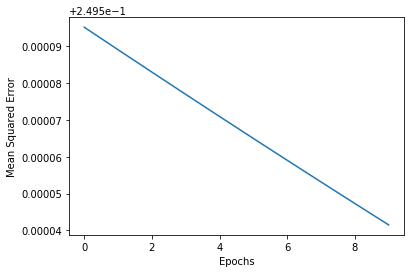

In [314]:


ffsnn = FFSNNetwork(2, [2, 3])
ffsnn.fit(X_train, Y_train, epochs=10, learning_rate=.001, display_loss=True)

